# DAML 07 - Regression Exercises - Solutions

Michal Grochmal <michal.grochmal@city.ac.uk>

Exercises rating:

★☆☆ - You should be able to based on Python knowledge plus lecture contents.

★★☆ - You will need to do extra thinking and some extra reading/searching.

★★★ - The answer is difficult to find by a simple search,
      requires you to do a considerable amount of extra work by yourself
      (feel free to ignore these exercises if you're short on time).

The Boston housing dataset is a classical regression set,
it contains several socio-economical features and the target price of the houses
in several areas of Boston.
This set is quite bad for prediction with linear models
but we will try to see how far can we get using plain linear regressions.

Each exercise depends on the output of the previous one,
therefore you need to perform them in  order.
First let's import the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
from sklearn.datasets import load_boston
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
boston = load_boston()
X, y = boston.data, boston.target
print(boston.DESCR)
boston.feature_names

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### 1. Perform simple linear regression and evaluate it through cross-validation (★☆☆)

Use 5-fold cross-validation (`cv=5`).

In [2]:
model = LinearRegression()
cross_val_score(model, X, y, cv=5)

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

This variates wildly!  Sometimes we get a good score, sometimes it is awful.
We have ~500 samples, therefore `cv=5` should be a good enough split,
what makes the disparity here is likely to be misleading features.

#### 2. Find the features that perform better alone (★★☆)

Since the output of the previous exercise is quite inconsistent:
depending on how we divide the data we get very different results,
we need to try to work around the problem.
It is likely that the most prominent features will give us a better picture.

Use cross-validation and build a model against each single feature.
Remember that the `sklearn` models expect a 2D array as the feature argument,
therefore select features as `X[:, i:i+1]` instead of `X[:, i]`.

The final answer should be all features in order of their relevance
as single predictors.

In [3]:
model = LinearRegression()
features = []
for f in range(X.shape[1]):
    features.append(np.mean(cross_val_score(model, X[:, f:f+1], y, cv=5)))
boston.feature_names[np.argsort(features)][::-1]

array(['LSTAT', 'RM', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'NOX', 'B',
       'CRIM', 'AGE', 'ZN', 'DIS', 'CHAS'], dtype='<U7')

#### 3. Take the two most important features and build a feature matrix with them alone (★☆☆)

In [4]:
feat = np.argsort(features)[-2:]
X_new = X[:, feat]
feat

array([ 5, 12])

#### 4. Scatter plot the two features against each other (★☆☆)

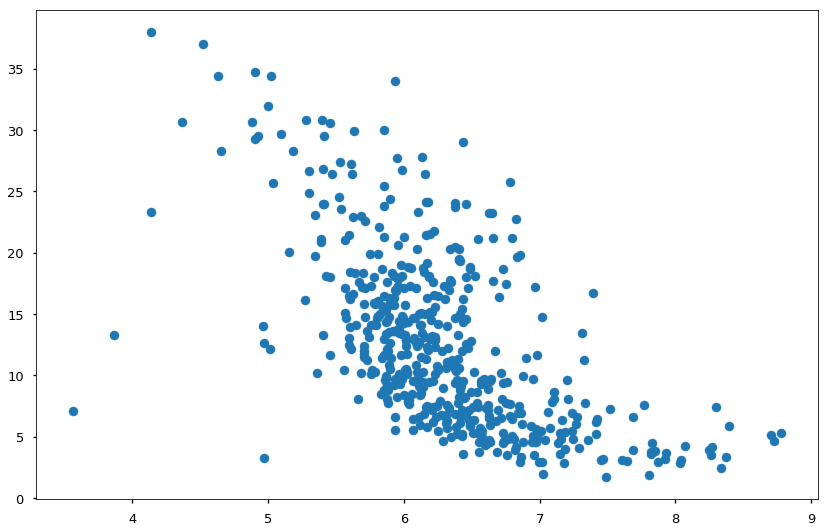

In [5]:
fig, ax = plt.subplots(figsize=(14, 9))
ax.scatter(X_new[:, 0], X_new[:, 1]);

That kind-of looks like a 3rd degree polynomial.

#### 5. Use a preprocessing pipeline and try to build a more consistent model (★★☆)

From the plot above try to guesstimate a good preprocessing method.

In [6]:
X, y = boston.data, boston.target
model = make_pipeline(PolynomialFeatures(degree=3), Ridge(alpha=0.1))
cross_val_score(model, X[:, feat], y, cv=5)

array([0.76030811, 0.83528524, 0.72183832, 0.301149  , 0.36577304])

With the polynomial trick we did not get a better classification.
Yet, the $R2$ measure does not variate as wildly on these two features
as it does for either all features or every feature alone.